In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [311]:

fulldf=pd.read_csv('fulldf.csv')

In [179]:
fulldf.head()

,Title,Movie Rating,Year,Director,Gross Income in millions (USD),Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget in millions (USD),Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,"['Biography', ' Drama', ' History']",134,8.1,620348.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,"['Biography', ' Drama']",94,7.6,340655.0,18.0,1.888889
2,2001: A Space Odyssey,G,1968,Stanley Kubrick,56.95,"['Adventure', ' Sci-Fi']",149,8.3,583340.0,10.5,442.380952
3,21 Grams,R,2003,Alejandro G. Iñárritu,16.29,"['Crime', ' Drama', ' Thriller']",124,7.7,220522.0,20.0,-18.550000
4,25th Hour,R,2002,Spike Lee,13.06,['Drama'],135,7.6,167314.0,4.5,190.222222


# Top 20 grossing movies and Top 20 most profitable movies

In [180]:
"""Funtion to plot bargraphs using the (Dataframe, xvalues,yvalues,string title)"""
def bargraph (Dataframe,xColumn,yColumn,str):
    plt.figure(figsize=(15,10))
    sns.barplot(y=yColumn,x=xColumn)
    plt.title(str)
    

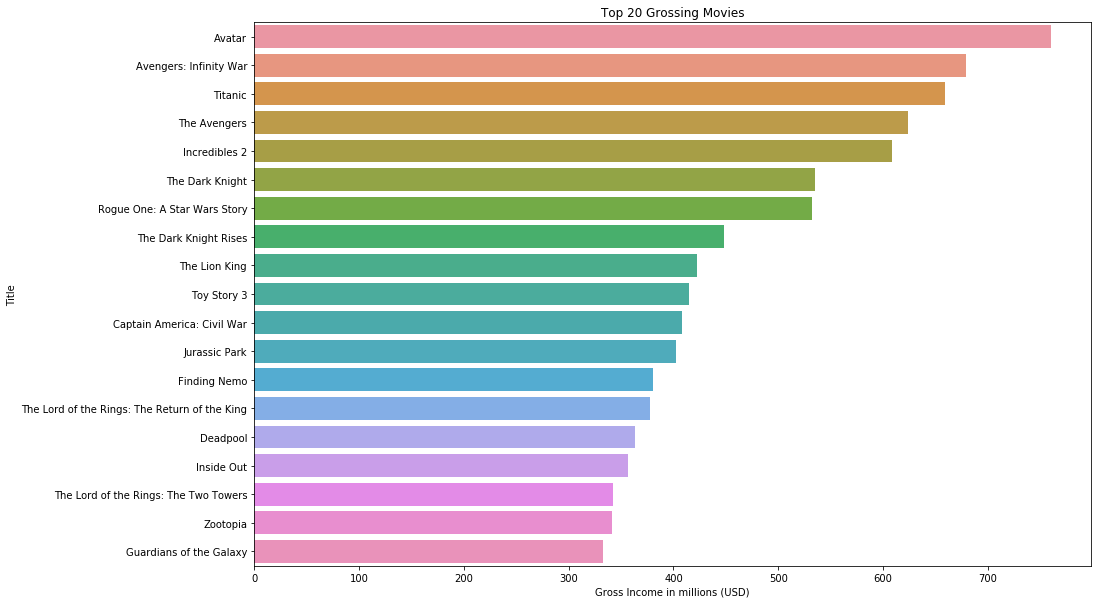

In [181]:
group_df = fulldf.sort_values('Gross Income in millions (USD)',ascending=False).reset_index().head(20) # Creat new df with sorted gross income values and limit to top 20
bargraph(group_df,group_df['Gross Income in millions (USD)'],group_df['Title'],"Top 20 Grossing Movies")



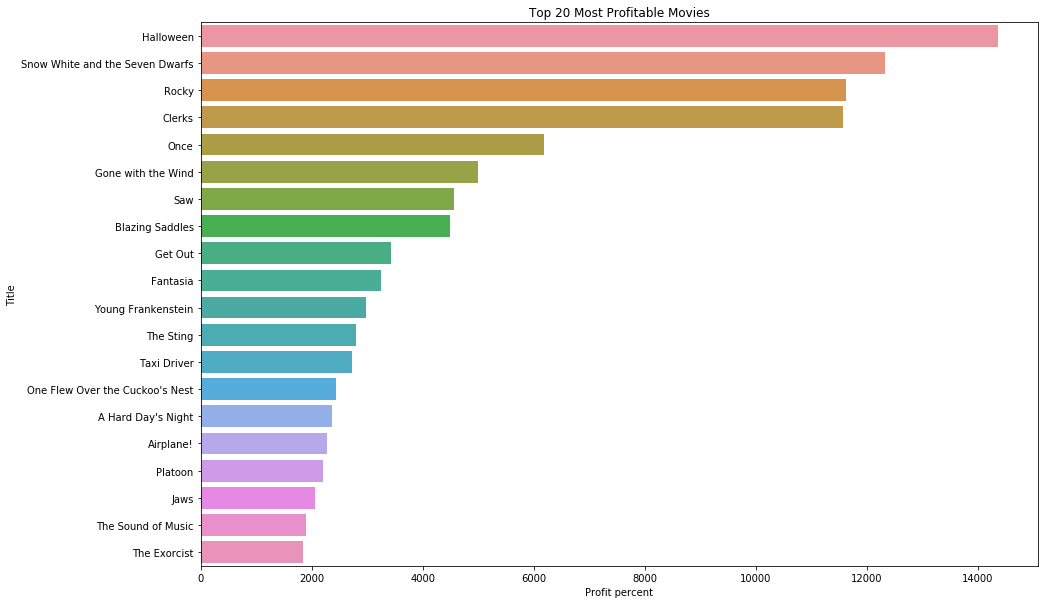

In [182]:
group_df = fulldf.sort_values('Profit percent',ascending=False).reset_index().head(20)
bargraph(group_df,group_df['Profit percent'],group_df['Title'],"Top 20 Most Profitable Movies")


## We can see that none of the top Grossing movies are among the most profitable ,So does a big budget movie necessarily make more money in terms of money invested? Down below we examine IMDb Top 1000 to answer this question.

In [235]:
testdf = fulldf[['Profit percent','Gross Income in millions (USD)','Budget in millions (USD)']] #New dataframe with only the Money figures

#testdf.info()


In [236]:
testdf[(np.abs(stats.zscore(testdf)) < 3).all(axis=1)]# remove outliers from all columns https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame


,Profit percent,Gross Income in millions (USD),Budget in millions (USD)
0,183.350000,56.67,20.0
1,1.888889,18.34,18.0
2,442.380952,56.95,10.5
3,-18.550000,16.29,20.0
4,190.222222,13.06,4.5
...,...,...,...
469,16.960000,233.92,200.0
470,2982.142857,86.30,2.8
471,-61.082353,33.08,85.0
472,220.296610,75.59,23.6


# For the top1000 movies As Budget of a movie increases Gross income increases 

Text(0.5, 1.0, 'Gross vs Budget in millions (USD) for Top 1000 IMDb movies')

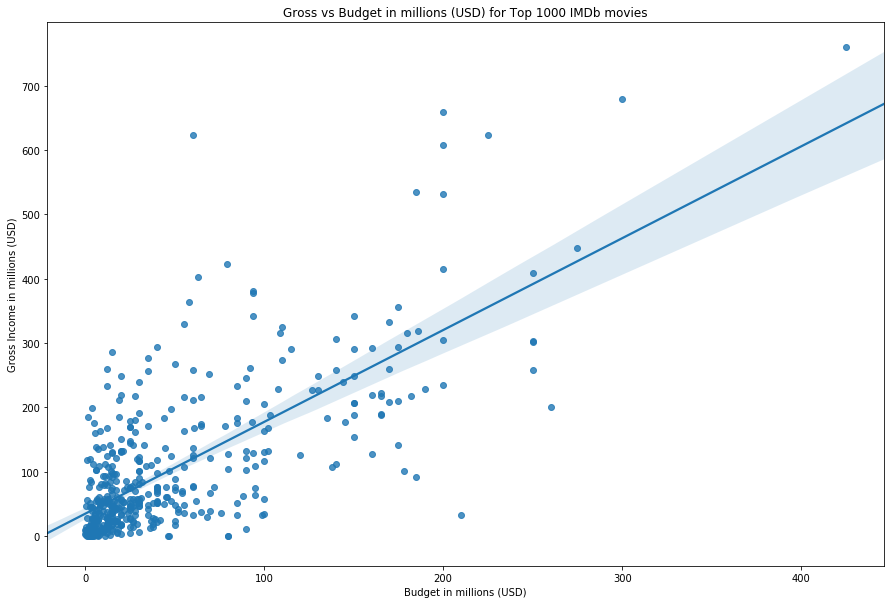

In [195]:
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Gross Income in millions (USD)'],data=testdf)
plt.title('Gross vs Budget in millions (USD) for Top 1000 IMDb movies')

# But as Budget increases percent profit actually decreases.

Text(0.5, 1.0, 'Profit percent vs Budget in millions (USD) for Top 1000 IMDb movies')

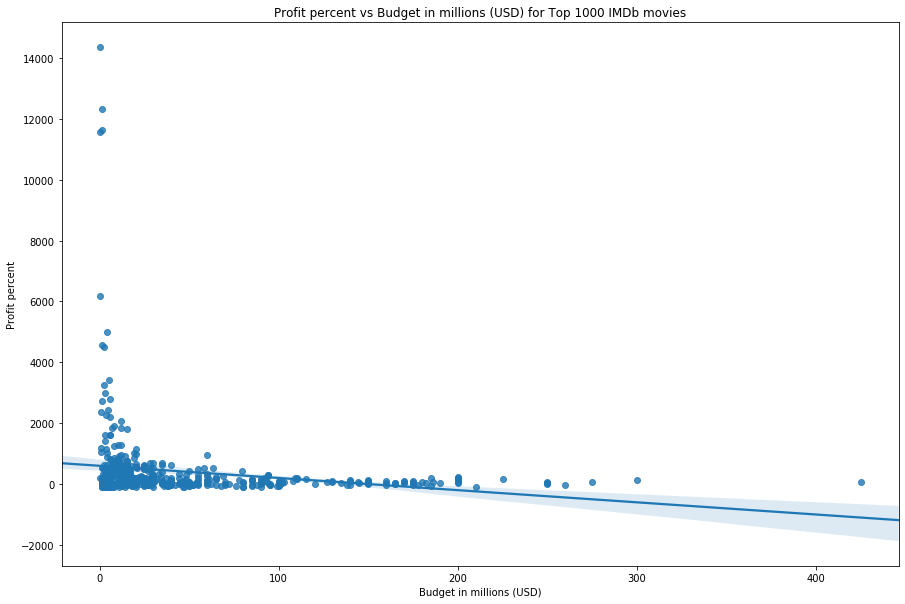

In [196]:
#sns.distplot( testdf["Profit percent"] , color="skyblue" )
#sns.distplot( testdf["Gross Income"] , color="red")
# need to elimate outliers and regraph lmplot
plt.figure(figsize=(15,10))
sns.regplot(x=testdf['Budget in millions (USD)'], y=testdf['Profit percent'],data=testdf)
plt.title('Profit percent vs Budget in millions (USD) for Top 1000 IMDb movies')

In [158]:
#sns.regplot(x=testdf['Gross Income'], y=testdf['Profit percent'],data=testdf)

#  Although investing a larger amount could lead to a large return it also involves a lot more risk and a relatively smaller percent profit ! We would recommend a smaller budget to start. 

In [9]:
#sns.boxplot(fulldf["Profit_percent"])
#sns.boxplot(fulldf["Gross_Income"])

In [242]:
fulldf['Budget in millions (USD)'].describe()


count    474.000000
mean      46.484499
std       58.688403
min        0.027000
25%       10.000000
50%       23.300000
75%       60.000000
max      425.000000
Name: Budget in millions (USD), dtype: float64

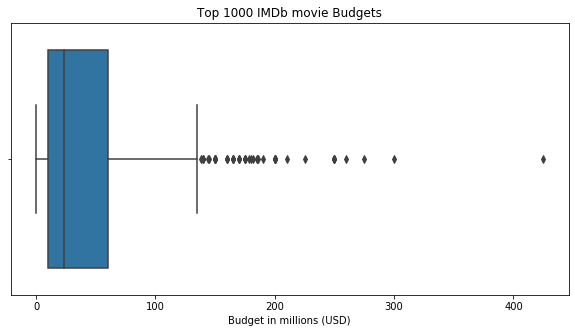

In [252]:
plt.figure(figsize=(10,5))
sns.boxplot(fulldf['Budget in millions (USD)'])
plt.title('Top 1000 IMDb movie Budgets')
plt.show()

count      474.000000
mean       412.312573
std       1296.203181
min       -100.000000
25%         16.915000
50%        110.437963
75%        340.576923
max      14361.538462
Name: Profit percent, dtype: float64

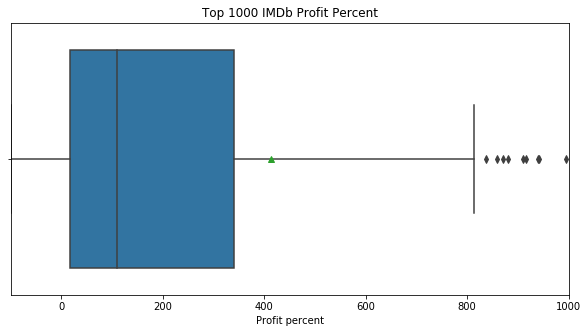

In [253]:
plt.figure(figsize=(10,5))
sns.boxplot(fulldf['Profit percent'],showmeans=True).set_xlim(-100, 1000)
plt.title('Top 1000 IMDb Profit Percent')
fulldf['Profit percent'].describe()

# Based on Top1000 movies of imdb have a median buget of about 24 million with an average return of 110 %

In [282]:
#group_df = fulldf.sort_values('Gross Income in millions (USD)',ascending=False).reset_index().head(20) # Creat new df with sorted gross income values and limit to top 20
#group_df['Budget in millions (USD)'].describe()

# plt.figure(figsize=(10,5))
sns.boxplot(group_df['Budget in millions (USD)'])
plt.title('Budget of the Top 20 Grossing Movies ')
plt.show()
group_df['Budget in millions (USD)'].describe()
#bargraph(group_df,group_df['Gross Income in millions (USD)'],group_df['Title'],"Top 20 Grossing Movies Budget")

# plt.figure(figsize=(10,5))
sns.boxplot(group_df['Profit percent'])
plt.title('Profit Perent of the Top 20 Grossing Movies ')
plt.show()
group_df['Profit percent'].describe()

# Top 20 Grossing movies had a median buget of about 180 million with an median return of 183%

# Budget Keytakeaway: Based on our Budget analysis our Budget varies between 24 million and 180 million depending on how much risk Microsoft wants to take.

# What genres generated most Gross Income 

In [42]:
#Genre_group_df = fulldf.groupby('Movie Genre')['Movie Genre','Gross Income'].mean() # new df with groped data based on genre, along with related gross income means

In [43]:
#Genre_group_df = Genre_group_df.sort_values('Gross Income',ascending=False).reset_index().head(20)# sort the df based on Gross income values, limi to top 20

In [283]:
#bargraph(Genre_group_df,Genre_group_df['Gross Income'],Genre_group_df['Movie Genre'],"Top 20 Grossing Movie Genres using average Gross Income")


# What Genres yielded the best returns ?

In [45]:
Genre_group_df = fulldf.groupby('Movie Genre')['Movie Genre','Profit percent'].mean()

In [46]:
Genre_group_df = Genre_group_df.sort_values('Profit percent',ascending=False).reset_index().head(20)

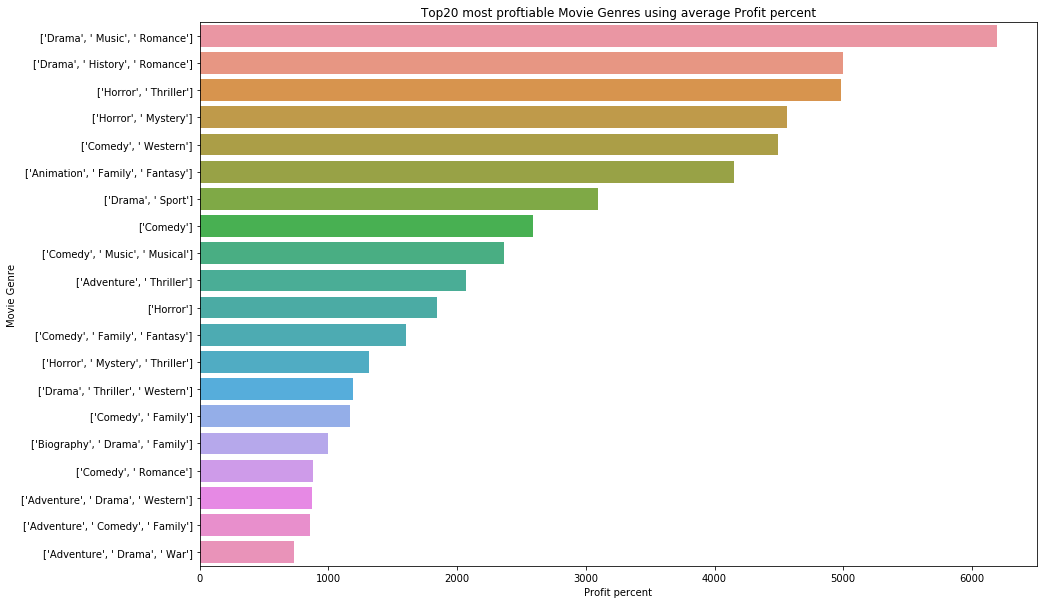

In [48]:
bargraph(Genre_group_df,Genre_group_df['Profit percent'],Genre_group_df['Movie Genre'],"Top20 most proftiable Movie Genres using average Profit percent")

In [312]:
fulldf['Movie Genre'] =fulldf['Movie Genre'].str.strip('[]''').str.split(',')

In [313]:
single_genre_df = fulldf.explode('Movie Genre')

In [314]:
single_genre_df = single_genre_df.groupby('Movie Genre')['Movie Genre','Profit percent','Gross Income in millions (USD)'].mean()

In [315]:
single_genre_df=single_genre_df.sort_values('Profit percent',ascending=False).reset_index()

single_genre_df.head()

,Movie Genre,Profit percent,Gross Income in millions (USD)
0,'Horror',2587.466617,82.715000
1,' Western',1102.252550,108.632857
2,' Sport',1002.719970,73.705000
3,' Family',933.623084,138.162857
4,' Music',912.369009,57.747500


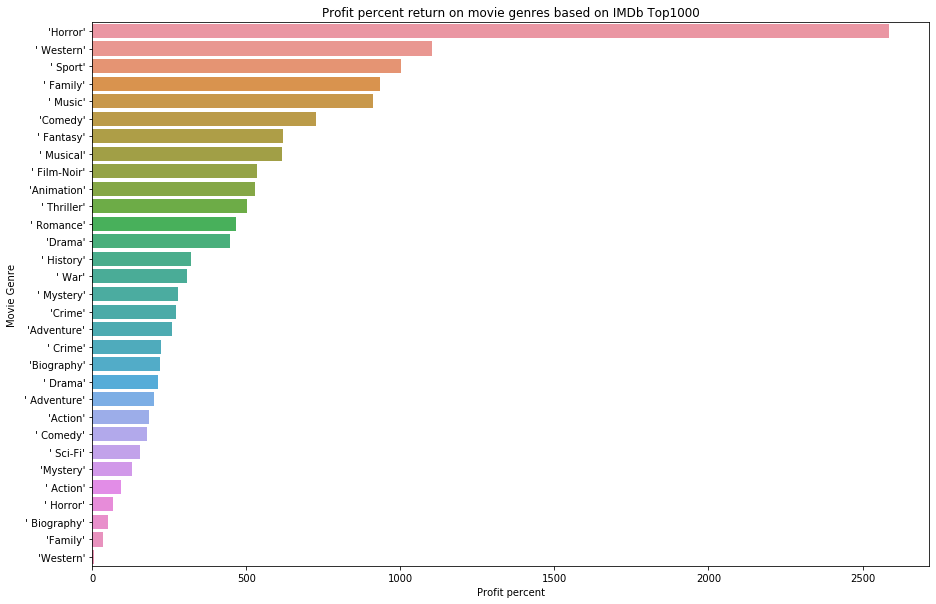

In [316]:
bargraph(single_genre_df,single_genre_df['Profit percent'],single_genre_df['Movie Genre'],"Profit percent return on movie genres based on IMDb Top1000")

In [318]:
single_genre_df=single_genre_df.sort_values('Gross Income in millions (USD)',ascending=False).reset_index()

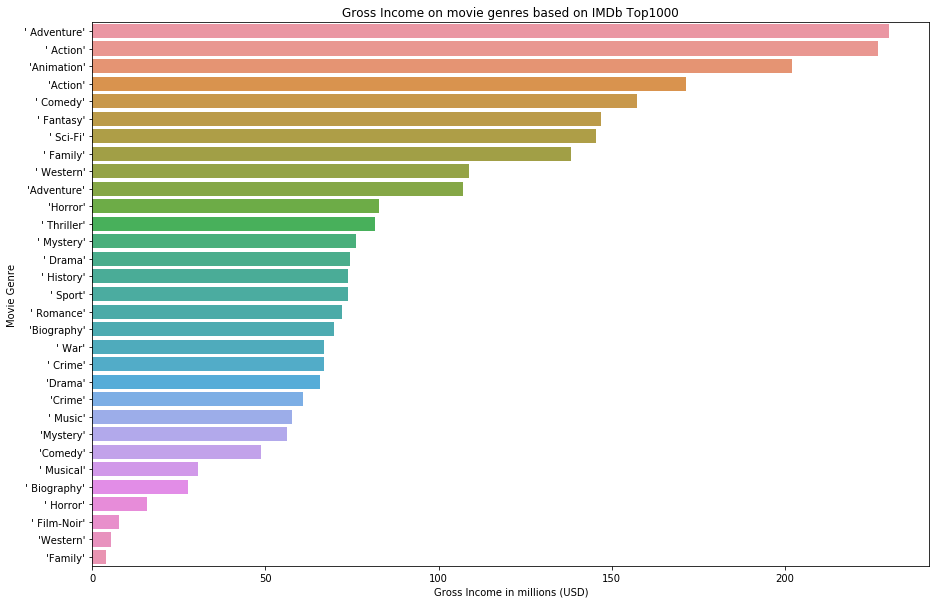

In [319]:
bargraph(single_genre_df,single_genre_df['Gross Income in millions (USD)'],single_genre_df['Movie Genre'],"Gross Income on movie genres based on IMDb Top1000")

# Keytakeaways: Movies that made the most profit and the movies that Generated most gross income have a combination of genres as opposed to a single genre. Among that Seems action,adventure,animation were top grossing whereas Horror ,Western,Sport made the most profit.


In [52]:
group_df = fulldf.groupby('Movie Genre')['Movie Genre','IMDb Rating'].mean()

group_df.head()

,IMDb Rating
Movie Genre,
"['Action', ' Adventure', ' Comedy']",7.860000
"['Action', ' Adventure', ' Drama']",8.012500
"['Action', ' Adventure', ' Family']",7.600000
"['Action', ' Adventure', ' Fantasy']",7.866667
"['Action', ' Adventure', ' Mystery']",7.600000


In [53]:
group_df = group_df.sort_values('IMDb Rating',ascending=False).reset_index().head(20)

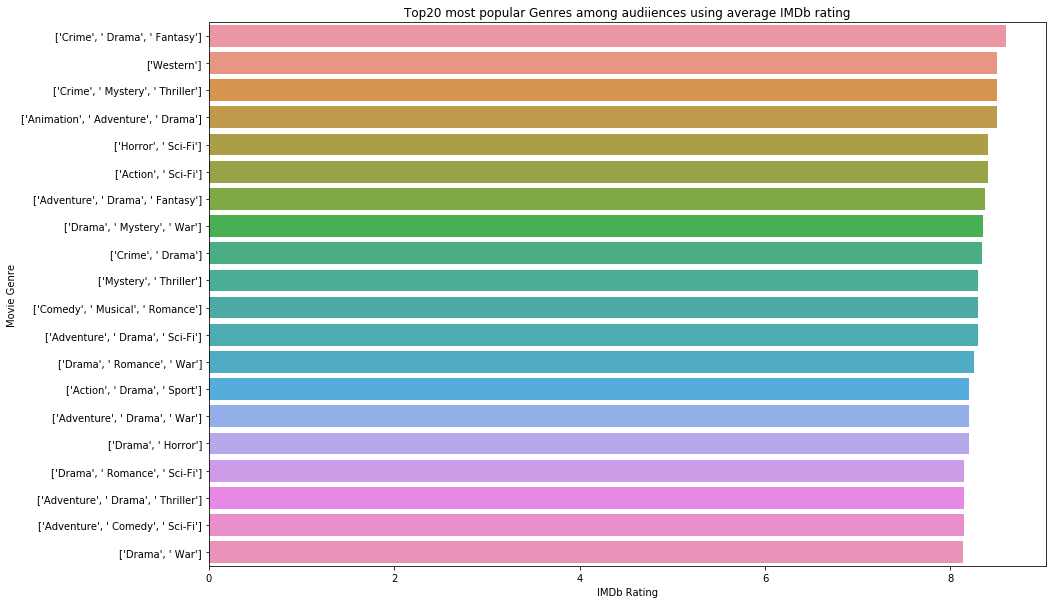

In [54]:
bargraph(group_df,group_df['IMDb Rating'],group_df['Movie Genre'],"Top20 most popular Genres among audiiences using average IMDb rating")



In [75]:
Dcounts = fulldf.groupby('Movie Genre').count()
Dcounts= Dcounts.sort_values('Title',ascending=False).reset_index().head(20)


In [76]:
Dcounts.rename(columns = {'Title':'Title count'}, inplace = True) 

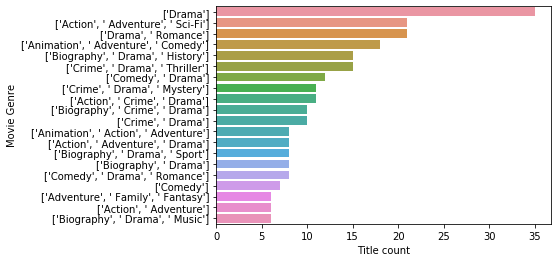

In [77]:
plt6=sns.barplot(y=Dcounts['Movie Genre'],x=Dcounts['Title count'])
#Dcounts.sort_values('Director',ascending=False)

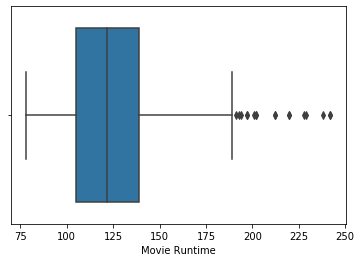

In [301]:
sns.boxplot(fulldf['Movie Runtime'])


In [305]:
fulldf['Movie Runtime'].describe()

count    474.000000
mean     125.660338
std       28.658679
min       78.000000
25%      105.000000
50%      121.500000
75%      139.000000
max      242.000000
Name: Movie Runtime, dtype: float64

In [5]:
upoutlier =125.66 + 3*28.66 # 211.64
lowoutlier = 125.66 - 3*28.66 # 39.68
print ("IMDb Top 1000 movies have a Max runtime of {} minutes, Anything higher that that is unusual. ".format(upoutlier))


IMDb Top 1000 movies have a Max runtime of 211.64 minutes, Anything higher that that is unusual. 


# In the Top1000 Movies considering each second of movie production costs money , a max runtime of approx 212 min is ideal. This is further validated by the runtime of top20 grossing and top20 most profitable as shown below. (Gone with the wind is an outlier)


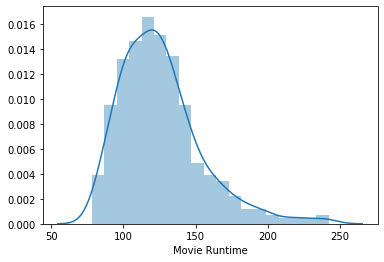

In [306]:
sns.distplot(fulldf['Movie Runtime'])

In [347]:

group_df = fulldf.sort_values('Gross_Income',ascending=False).reset_index().head(20) # Creat new df with sorted gross income values and limit to top 20


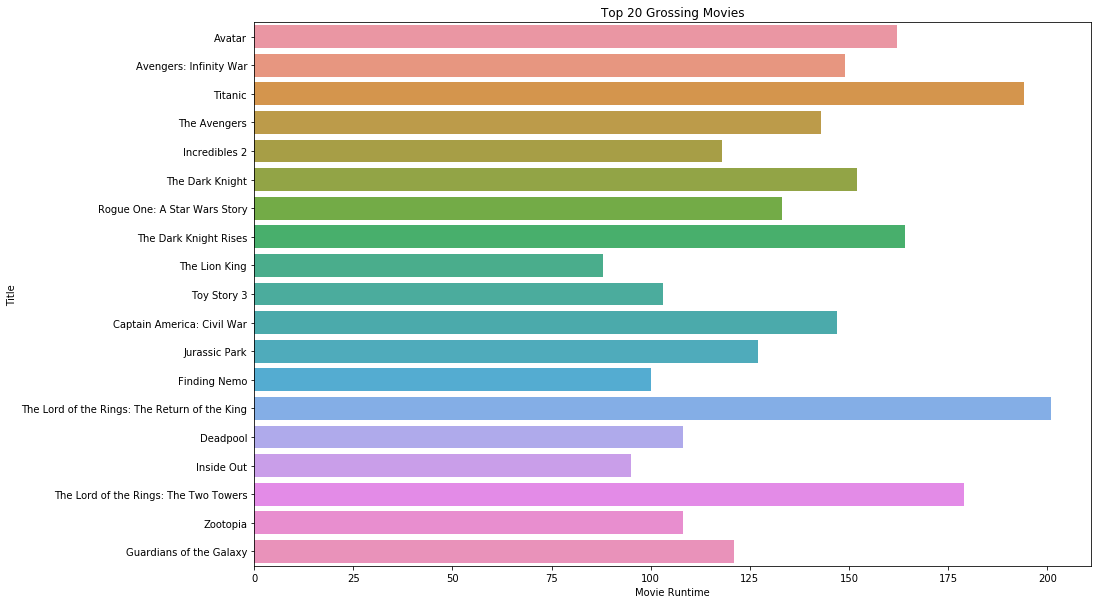

In [303]:
plt.figure(figsize=(15,10))
plt.title("Top 20 Grossing Movies Runtime")
plt8=sns.barplot(y=group_df.Title,x=group_df['Movie Runtime'])


In [337]:
group_df = fulldf.sort_values('Profit_percent',ascending=False).reset_index().head(20)


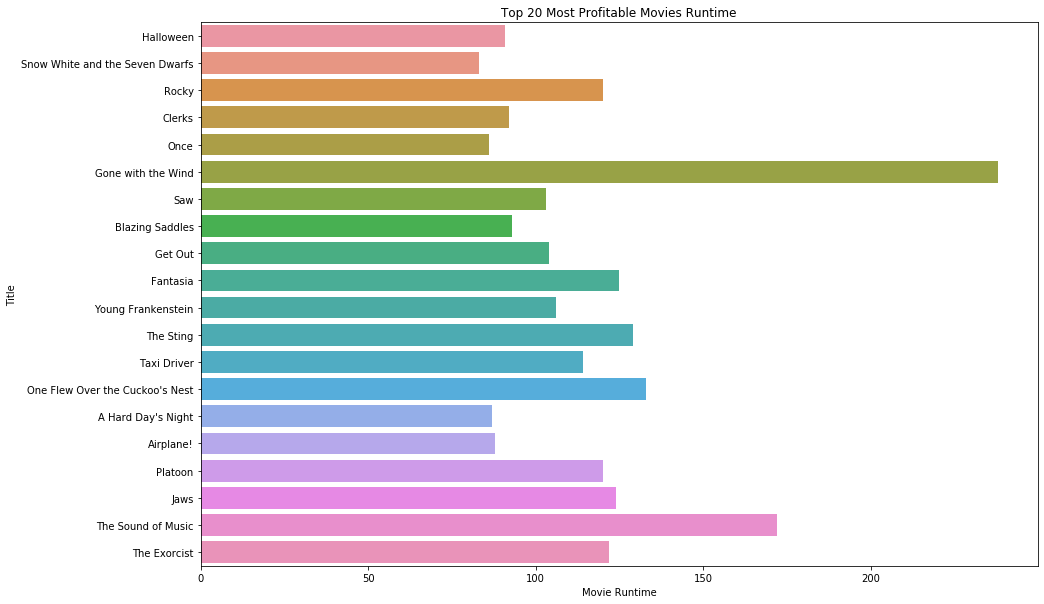

In [346]:
plt.figure(figsize=(15,10))
plt.title("Top 20 Most Profitable Movies Runtime")
plt9=sns.barplot(y=group_df.Title,x=group_df['Movie Runtime'])
#plt9.set_xticklabels(plt9.get_xticklabels(), rotation=90)

# Top 20 Grossing movies had an average budget of 174 million

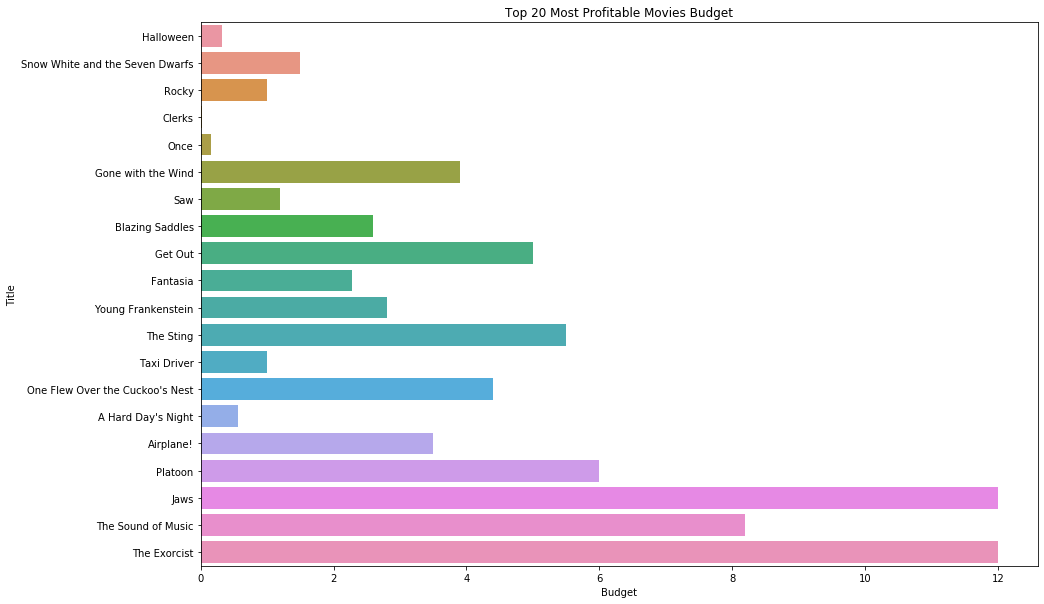

In [385]:
group_df = fulldf.sort_values('Profit_percent',ascending=False).reset_index().head(20)
plt.figure(figsize=(15,10))
plt.title("Top 20 Most Profitable Movies Budget")
plt12=sns.barplot(y=group_df.Title,x=group_df.Budget)

In [357]:
group_df['Budget'].describe()

count    20.00000
mean      3.69650
std       3.59768
min       0.02700
25%       1.00000
50%       2.70000
75%       5.12500
max      12.00000
Name: Budget, dtype: float64

# Top 20 most profitable movies had an average budget of approx 4 million

# So perhaps microsoft wants to invest less and do it more often so theres less risk per investment or take a bigger risk and do a full blown production ...upto companies goals/agressiveness etc?

In [373]:

director_df=fulldf.groupby('Director').count()

In [386]:
director_df=director_df.sort_values('Title',ascending=False).reset_index().head(20)

In [387]:
director_df.head()

,index,Director,Title,Movie Rating,Year,Gross_Income,Movie_Genre,Movie Runtime,IMDb Rating,Votes,Budget,Profit_percent
0,0,Steven Spielberg,10,10,10,10,10,10,10,10,10,10
1,1,Christopher Nolan,8,8,8,8,8,8,8,8,8,8
2,2,Martin Scorsese,8,8,8,8,8,8,8,8,8,8
3,3,David Fincher,8,8,8,8,8,8,8,8,8,8
4,4,Clint Eastwood,7,7,7,7,7,7,7,7,7,7


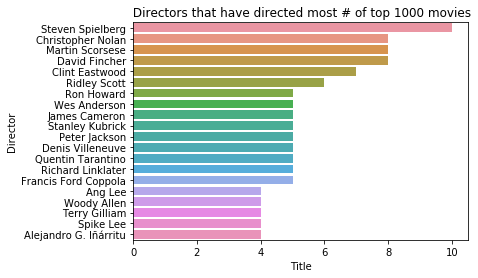

In [383]:

plt.title(" Directors that have directed most # of top 1000 movies")
plt13=sns.barplot(y=director_df.Director,x=director_df.Title)


,Title,Movie Rating,Year,Director,Gross Income,Movie Genre,Movie Runtime,IMDb Rating,Votes,Budget,Profit percent
0,12 Years a Slave,R,2013,Steve McQueen,56.67,['Biography',134,8.1,620348.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,' Drama',134,8.1,620348.0,20.0,183.350000
0,12 Years a Slave,R,2013,Steve McQueen,56.67,' History'],134,8.1,620348.0,20.0,183.350000
1,127 Hours,R,2010,Danny Boyle,18.34,['Biography',94,7.6,340655.0,18.0,1.888889
1,127 Hours,R,2010,Danny Boyle,18.34,' Drama'],94,7.6,340655.0,18.0,1.888889
